In [1]:
!pip install nltk

In [ ]:
#!pip install wordcloud

In [2]:
import nltk

In [7]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
import nltk

In [4]:
import pandas as pd,numpy as np
import matplotlib.pyplot as plt

In [5]:
reviews = pd.read_csv("K8 Reviews.csv")

In [7]:
reviews.tail(10)

,sentiment,review
14665,1,Worth your money.
14666,0,I am facing problem with network connection.Wh...
14667,1,Nice phone
14668,0,Not so good.
14669,0,Very poour battery parformance and prosecer
14670,1,"I really like the phone, Everything is working..."
14671,1,The Lenovo K8 Note is awesome. It takes best p...
14672,1,Awesome Gaget.. @ this price
14673,1,This phone is nice processing will be successf...
14674,1,Good product but the pakeging was not enough.


This dataset is scrapped from amazon about Lenevo K8 mobile phones.While the users gave the reviews, they also give the ratings
- Ratings 1,2,3 -> negitive sentiment has a value 0 in the sentiment column
- Ratings 4,5 -> positive sentiment has a value 1 in the sentiment column

In [8]:
reviews.sentiment.value_counts()

0    7712
1    6963
Name: sentiment, dtype: int64

In [9]:
reviews.sentiment.value_counts(normalize = True)

0    0.52552
1    0.47448
Name: sentiment, dtype: float64

In [11]:
reviews.shape

(14675, 2)

In [12]:
reviews.review.values

array(['Good but need updates and improvements',
       "Worst mobile i have bought ever, Battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if I put mobile idle its getting discharged.This is biggest lie from Amazon & Lenove which is not at all expected, they are making full by saying that battery is 4000MAH & booster charger is fake, it takes at least 4 to 5 hours to be fully charged.Don't know how Lenovo will survive by making full of us.Please don;t go for this else you will regret like me.",
       'when I will get my 10% cash back.... its already 15 January..',
       ..., 'Awesome Gaget.. @ this price',
       'This phone is nice processing will be successful but dual camera is not be successfully in dual mod',
       'Good product but the pakeging was not enough.'], dtype=object)

In [21]:
sentence = "Good product, bad, ca,me,r,a"
sentence.split(",")

['Good product', ' bad', ' ca', 'me', 'r', 'a']

In [18]:
listwords = ["good product",'bad','camera']
"=".join(listwords)

'good product=bad=camera'

In [48]:
sentence = "PHOnE is GooD..."
print(sentence.lower(),sentence.upper())

phone is good... PHONE IS GOOD...


In [15]:
import re

In [16]:
allreviews = " ".join(reviews.review.values)
#allreviews = " --------$$$----- ".join(reviews.review.values)
allreviews = allreviews.lower()
allreviews = re.sub("\.",". ",allreviews)
#allreviews

In [18]:
#all_terms = allreviews.split(" ")
from nltk.tokenize import word_tokenize
all_terms = word_tokenize(allreviews)
fdist = {}
for word in all_terms:
    #fdist[word] = fdist[word] + 1
    fdist[word] = fdist.get(word,0) + 1

In [19]:
len(all_terms)

349371

In [20]:
len(set(all_terms))

13693

In [83]:
326625/17602

18.556129985228953

In [21]:
from string import punctuation

In [22]:
print(list(punctuation))

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [23]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
from nltk.corpus import stopwords
stop_nltk = stopwords.words("english")
stop_nltk.remove("not")
punct_stop = list(punctuation) + stop_nltk + ["lenovo","phone","k8","amazon","product"]

In [25]:
listwords = [word for word in word_tokenize(allreviews) if word not in punct_stop]

In [26]:
len(set(listwords))

13525

In [27]:
len(listwords)

179179

In [29]:
140000/200

700.0

In [30]:
len(punct_stop)

215

In [31]:
fdist = {}
for word in listwords:
    #fdist[word] = fdist[word] + 1
    fdist[word] = fdist.get(word,0) + 1

In [33]:
fdist['good']

6120

In [54]:
fdist.get("Good",0)

0

In [34]:
sentence = "phone is good, really good. nothing good about amazon, bad is amazon. really bad."
sentence

'phone is good, really good. nothing good about amazon, bad is amazon. really bad.'

In [79]:
print(sentence.split(" "), len(sentence.split(" ")), len(set(sentence.split(" "))))
print(word_tokenize(sentence), len(word_tokenize(sentence)),len(set(word_tokenize(sentence))))

['phone', 'is', 'good,', 'really', 'good.', 'nothing', 'good', 'about', 'amazon,', 'bad', 'is', 'amazon.', 'really', 'bad.'] 14 12
['phone', 'is', 'good', ',', 'really', 'good', '.', 'nothing', 'good', 'about', 'amazon', ',', 'bad', 'is', 'amazon', '.', 'really', 'bad', '.'] 19 10


In [44]:
print(fdist["Good"],fdist['good'],fdist['good.'],fdist['gOOd'],fdist['good,'],fdist['GOOD'],fdist['goood'],fdist['gud'],fdist['good...'])

1315 3348 490 1 173 56 3 63 62


In [ ]:
#good....

In [35]:
import re
sentence1 = "Phone is good.... camera is good bad, OS is okay"
sentence2 = re.sub("\.","",sentence1)
sentence2

'Phone is good camera is good bad, OS is okay'

In [36]:
sentence3 = re.sub("good","perfect",sentence1)
sentence3

'Phone is perfect.... camera is perfect bad, OS is okay'

In [68]:
fdist.get("Good",6510651651651)

6510651651651

In [29]:
fdist.get("Goodgsdrsdghsdg",6510651651651)

6510651651651

In [37]:
fdist

{'good': 6120,
 'need': 257,
 'updates': 145,
 'improvements': 7,
 'worst': 959,
 'mobile': 2511,
 'bought': 315,
 'ever': 317,
 'battery': 3466,
 'draining': 205,
 'like': 962,
 'hell': 42,
 'backup': 682,
 '6': 191,
 '7': 124,
 'hours': 424,
 'internet': 151,
 'uses': 25,
 'even': 838,
 'put': 66,
 'idle': 72,
 'getting': 409,
 'discharged': 23,
 'biggest': 30,
 'lie': 6,
 'lenove': 6,
 'not': 6124,
 'expected': 215,
 'making': 38,
 'full': 368,
 'saying': 34,
 '4000mah': 111,
 'booster': 6,
 'charger': 493,
 'fake': 66,
 'takes': 297,
 'least': 36,
 '4': 430,
 '5': 413,
 'fully': 129,
 'charged': 134,
 "n't": 1860,
 'know': 145,
 'survive': 8,
 'us': 57,
 'please': 414,
 'go': 389,
 'else': 69,
 'regret': 30,
 'get': 527,
 '10': 202,
 'cash': 35,
 'back': 693,
 'already': 77,
 '15': 113,
 'january': 11,
 'everthey': 1,
 'changed': 29,
 'last': 294,
 'problem': 1408,
 'still': 205,
 'returning': 36,
 'highly': 37,
 'disappointing': 55,
 "'m": 199,
 'telling': 10,
 'buyi': 1,
 'totall

In [38]:
freq = {"words":list(fdist.keys()),"freq":list(fdist.values())}
df_dist = pd.DataFrame(freq)
df_dist

,words,freq
0,good,6120
1,need,257
2,updates,145
3,improvements,7
4,worst,959
...,...,...
13520,parformance,1
13521,prosecer,1
13522,whater,1
13523,gaget,1


In [39]:
#30321 - 26707  - 17602


<AxesSubplot:xlabel='words'>

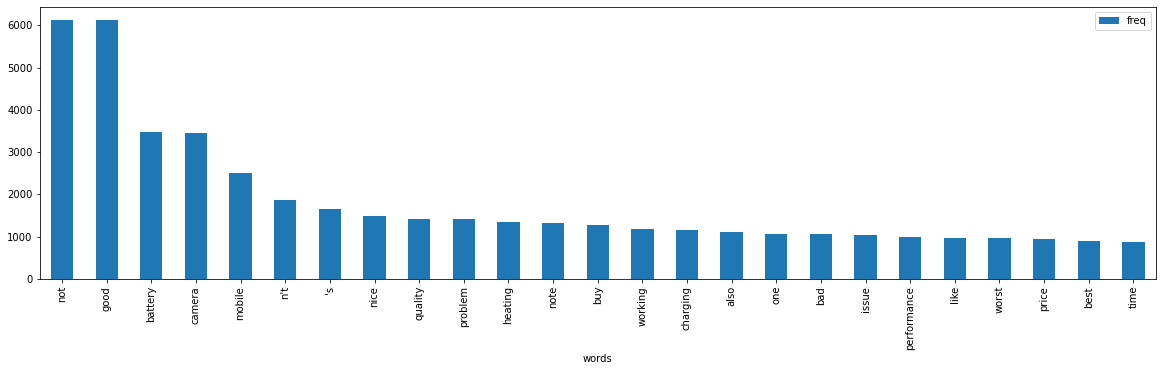

In [40]:
%matplotlib inline
df_dist.sort_values(ascending=False, by="freq").head(25).\
plot.bar(x= "words", y= "freq",figsize=(20,5)) 

In [ ]:
from wordcloud import WordCloud

In [ ]:
reviews_combined = " ".join(reviews.review.values)

In [ ]:
#Total words in reviews
len(reviews_combined)

In [ ]:
reviews_combined[:200]

In [ ]:
word_cloud = WordCloud().generate_from_text(reviews_combined)

In [ ]:
#?WordCloud

In [ ]:
plt.figure()
plt.imshow(word_cloud)
plt.show()

In [ ]:
word_cloud = WordCloud(width=800,height=800,background_color='white',max_words=150).\
generate_from_text(reviews_combined)

In [ ]:
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

In [ ]:
all_terms = []
fdist = {}
all_terms = reviews_combined.split(" ")
for word in all_terms:
    fdist[word] = fdist.get(word,0) + 1

In [ ]:
freq = {"words":list(fdist.keys()),"freq":list(fdist.values())}
df_dist = pd.DataFrame(freq)

In [ ]:
%matplotlib inline
df_dist.sort_values(ascending=False, by="freq").head(25).\
plot.bar(x= "words", y= "freq",figsize=(20,5)) 

Problems with the above visuals
    1.case is non uniform
    2. punctuations and stop words
    3. words with different tense forms like charged, charging, charges has its root form in charge

In [ ]:
#1. case normalization and tokenizing

In [ ]:
reviews.review[:10]

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
#All Reviews tokenized and in lower case
all_terms = word_tokenize(reviews_combined.lower())

In [ ]:
print(all_terms[:20])

In [ ]:
len(set(all_terms))

In [ ]:
#visualizing the frequency distrinution

In [ ]:
from nltk.probability import FreqDist

In [ ]:
fdist = FreqDist(all_terms)
fdist

In [ ]:
fdist.plot(30,cumulative=False)
plt.show()

In [ ]:
from string import punctuation
from nltk.corpus import stopwords

In [ ]:
stop_nltk = stopwords.words("english")

In [ ]:
stop_updated = stop_nltk + list(punctuation) + ["..."] + ["phone", "mobile","lenovo","k8","product"]

below code removes:
1. stopwords, 
2. punct's,
3. custom stop words,
4. words with lenght less than 2

In [ ]:
reviews_updated1 = [word for word in all_terms if word not in stop_updated and len(word) > 2]

In [ ]:
print(reviews_updated1[:20])

In [ ]:
len(set(reviews_updated1))

In [ ]:
from nltk.stem import SnowballStemmer
stemmer_s = SnowballStemmer("english")

In [ ]:
reviews_updated_stem = [ stemmer_s.stem(word) for word in reviews_updated1]

In [ ]:
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()

In [ ]:
reviews_updated_lemm = [ lemm.lemmatize(word) for word in reviews_updated1]

In [ ]:
print(len(set(reviews_updated_stem)),len(set(reviews_updated_lemm)))

In [ ]:
#Stememr reduces the number of distinct words in the corpus to a greater exten

In [ ]:
# Define function that takes in a raw string, returns a clean string
# - Tokenize, lower case, remove stop words, stem, stitch back to string
def clean_txt(sent):
    tokens = word_tokenize(sent.lower())
    stemmed = [stemmer_s.stem(term) for term in tokens if term not in stop_updated and len(term) > 2] 
    res = " ".join(stemmed)
    return res

In [ ]:
reviews['clean_review'] = reviews.review.apply(clean_txt)

In [ ]:
reviews.head()

# Word cloud on cleaned dataset

In [ ]:
reviews_combined = " ".join(reviews.clean_review.values)

In [ ]:
word_cloud = WordCloud(width=800,height=800,background_color='white',max_words=150).\
generate_from_text(reviews_combined)

In [ ]:
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

# Bar Graph on top 25 words

In [ ]:
all_terms = []
fdist = {}
all_terms = reviews_combined.split(" ")
for word in all_terms:
    fdist[word] = fdist.get(word,0) + 1

In [ ]:
freq = {"words":list(fdist.keys()),"freq":list(fdist.values())}
df_dist = pd.DataFrame(freq)

In [ ]:
%matplotlib inline
df_dist.sort_values(ascending=False, by="freq").head(25).\
plot.bar(x= "words", y= "freq",figsize=(20,5)) 

# Plot the bar graph for top 25 frequenctly used bigrams

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# create a bigram count vectorizer object
bigram_count_vectorizer = CountVectorizer(ngram_range=(2,2),max_features = 1500)

In [ ]:
X_bigram = bigram_count_vectorizer.fit_transform(reviews['clean_review'])

# Creating a DTM
DTM_bigram = pd.DataFrame(X_bigram.toarray(), columns=bigram_count_vectorizer.get_feature_names())

In [ ]:
bigram_count_vectorizer.get_feature_names()[:20]

In [ ]:
DTM_bigram.head()

In [ ]:
DTM_bigram.sum().sort_values(ascending=False).head(25).plot.bar(figsize=(20,5)) 

In the amazon case study dataset
Find the top 5 relavent reviews which has the below words
 - "battery drain"
 -"Good camera"
If there is a clash in the scores, review at index 0 has higher precedence than at index 1 and so on....

# Sentiment Classification

### Sentiment Prediction Strategy 1: Word based scoring 

In [ ]:
afinn = pd.read_csv("AFINN-111.txt", sep="\t", header=None)
afinn.columns = ['Term','Score']
term_scores = dict(afinn.values)

In [ ]:
def get_sentiment(sent):
    tokens = word_tokenize(sent.lower())
    score = 0
    for term in tokens:
        score += term_scores.get(term,0)
    return score

In [ ]:
reviews['sent_score'] = reviews.clean_review.apply(get_sentiment)

In [ ]:
reviews.head()

In [ ]:
reviews.sent_score.hist()

#sentiment Prediction
    if the sent_score > 0 predicted sentiment is 1
    else the predicted sentiment is 0

In [ ]:
reviews['sent_prediction'] = reviews.sent_score.apply(lambda x:1 if x>0 else 0)

In [ ]:
reviews.head()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
confusion_matrix(reviews.sentiment,reviews.sent_prediction)

In [ ]:
accuracy_score(reviews.sentiment,reviews.sent_prediction)

In [ ]:
#lets build a udf which takes a text as input and does all the above cleaning steps
# one review at a time will be passed from the the reviews column to this function
#based on the outcome of this function, you should be able to add a new column in the data frame
def  clean_txt_new(sent):
    tokens = word_tokenize(sent.lower().replace('[^a-z ]',' '))
    cleaned_token = [(term) for term in tokens 
               if term not in stop_updated and len(term) > 2] 
    res = " ".join(cleaned_token)
    return res

In [ ]:
reviews['clean_review_new'] = reviews.review.apply(clean_txt_new)

In [ ]:
reviews.head()

In [ ]:
reviews['sent_score_new'] = reviews.clean_review_new.apply(get_sentiment)

In [ ]:
reviews['sent_prediction_new'] = reviews.sent_score_new.apply(lambda x:1 if x>0 else 0)

In [ ]:
accuracy_score(reviews.sentiment,reviews.sent_prediction_new)

### Sentiment Prediction Strategy 2: Using popular package - Vader

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [ ]:
def get_vader_sentiment(sent):
    return analyser.polarity_scores(sent)['compound']

In [ ]:
reviews['score_vader'] = reviews.review.apply(get_vader_sentiment)

In [ ]:
reviews['sent_prediction_vader'] = reviews.score_vader.\
apply(lambda x:1 if x>0 else 0)

In [ ]:
accuracy_score(reviews.sentiment,reviews.sent_prediction_vader)

In [ ]:
confusion_matrix(reviews.sentiment,reviews.sent_prediction_vader)

### Sentiment Prediction Strategy : Making our own model

In [ ]:
reviews.head()

In [ ]:
X = reviews.clean_review.values
y = reviews.sentiment.values

In [ ]:
X[:5]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,
                                                 random_state=42)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(max_features=1500)

In [ ]:
# Extarct the features and transform -> get the count of terms in every document
X_train_bow = vectorizer.fit_transform(X_train)

In [ ]:
# Only transform -> get the count of terms in every document, the test data

X_test_bow = vectorizer.transform(X_test)

In [ ]:
X_train_bow.shape, X_test_bow.shape

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train_bow,y_train)

In [ ]:
y_test_pred = logreg.predict(X_test_bow)

In [ ]:
accuracy_score(y_test, y_test_pred)

#### Sentiment classification using tfidfvectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(max_features=2000)

In [ ]:
# Extarct the features and transform -> get the count of terms in every document
X_train_bow = vectorizer.fit_transform(X_train)

In [ ]:
# Only transform -> get the count of terms in every document, the test data
X_test_bow = vectorizer.transform(X_test)

In [ ]:
X_train_bow.shape, X_test_bow.shape

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train_bow,y_train)

In [ ]:
y_test_pred = logreg.predict(X_test_bow)

In [ ]:
accuracy_score(y_test, y_test_pred)

### Document clustering

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvectorizer = TfidfVectorizer(max_features=150)

In [ ]:
X = tfidfvectorizer.fit_transform(reviews['clean_review'])

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
num_clusters = 6
km = KMeans(n_clusters=num_clusters)
km.fit(X)

In [ ]:
pred_cluster = km.predict(X)
reviews['cluster_predicted'] = pred_cluster
reviews['cluster_predicted'].value_counts()

In [ ]:
pred_cluster.shape

In [ ]:
km.cluster_centers_.shape

in TFIDF or in DTM every word is a feature
when these words are clustered, the cluster center value for every feature tells us the centeroid of the word relavencies/frequencies.

Higher the cluster centeroid for that feature, higher will be value of word relevency/frequency.

In [ ]:
print("Top 5 terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = tfidfvectorizer.get_feature_names()
for i in range(num_clusters):
    print ("Cluster %d:" % i),
    for ind in order_centroids[i, : 5]:
        print (' %s' % terms[ind]),
    print

In [ ]:
group = reviews[reviews['cluster_predicted'] == 1]
text = ' '.join(reviews['clean_review'])
wc = WordCloud(background_color='white').generate(text)
plt.imshow(wc)

### Cosine Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
tfidfvectorizer = TfidfVectorizer(max_features=1500)

In [ ]:
X = tfidfvectorizer.fit_transform(reviews['clean_review'])
df_tfidf = pd.DataFrame(X.toarray(),columns=tfidfvectorizer.get_feature_names())

In [ ]:
#Check the cosine similarity with the second and the third reviews
cosine_similarity(df_tfidf[1:2], df_tfidf[2:3])

In [ ]:
cosine_similarity([df_tfidf['batteri'],df_tfidf['battery']])

In [ ]:
cs = cosine_similarity(df_tfidf.T)

In [ ]:
def get_similar_words(input_word, sim_mat):
    cos_vals = sim_mat[input_word].sort_values(ascending=False)
    similar_words = cos_vals.drop(input_word).head(5)
    return similar_words

In [ ]:
sim_mat = cosine_similarity(df_tfidf.T)

sim_mat = pd.DataFrame(sim_mat, columns= df_tfidf.columns, index= df_tfidf.columns)

get_similar_words('drain', sim_mat)

In [ ]:
#Understanding how the function works
sim_mat['charge'].sort_values(ascending=False).drop('charge').head(5)